# Imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# Preparando apenas dados acima de 2020

In [2]:
df = pd.read_csv('/content/drive/MyDrive/dataset_finalv3.csv').dropna(subset=['feedback_rating'])
df = df.query('feedback_rating > 0')
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
df.head()

,tipo_cliente,formato_redacao,start,tamanho_comentario_geral,correction_time,feedback_rating,proporcao_positiva,qtd_comentarios_especificos,proporcao_negativa,qtd_comentarios_positivos,qtd_comentarios_negativos,tamanho_medio_comentarios_especificos,tempo_vinculo_corretor,qtd_correcoes_anteriores,qtd_correcoes_dia,tempo_espera,dia_semana,mes_ano,dia_mes,tempo_vinculo_aluno,theme_id_essay,oficial_feedback_revis,competencia1,competencia2,competencia3,competencia4,competencia5,nota_final,media_temporal_aluno,media_temporal_corretor,std_temporal_aluno,std_temporal_corretor,mediana_temporal_aluno,mediana_temporal_corretor,score_medio_temporal_aluno,score_medio_temporal_corretor,score_std_temporal_aluno,diff_score_media_corretor,diff_score_media_aluno,qtd_feedbacks_aluno,feedbacks_positivos_aluno,feedbacks_negativos_aluno,proporcao_feedback_positivo_aluno,proporcao_feedback_negativo_aluno,qtd_feedbacks_corretor,feedbacks_positivos_corretor,feedbacks_negativos_corretor,proporcao_feedback_positivo_corretor,proporcao_feedback_negativo_corretor
0,Individual,Imagem,2015-04-10 00:51:22,0,2039.0,4.0,0.0,15,1.0,0.0,15.0,35.600000,26,0,0,46085.0,4,4,10,0,338,1.0,120.0,200.0,160.0,160.0,40.0,680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.366607,NaN,149.633393,NaN,0,0,0,NaN,NaN,0,0,0,0.000000,0.000000
1,Individual,Imagem,2015-04-21 12:40:07,287,1522.0,1.0,0.0,23,1.0,0.0,23.0,62.086957,38,1,1,943.0,1,4,21,0,356,1.0,80.0,80.0,80.0,80.0,0.0,320.0,NaN,4.00,NaN,0.000000,NaN,4.0,480.0,657.823956,0.0,-337.823956,160.0,0,0,0,0.0,0.0,1,1,0,1.000000,0.000000
2,Individual,Imagem,2015-04-21 14:28:42,232,1207.0,1.0,0.0,21,1.0,0.0,21.0,41.380952,38,0,5,1457.0,1,4,21,0,326,1.0,80.0,80.0,40.0,80.0,80.0,360.0,NaN,2.50,NaN,1.500000,NaN,2.5,NaN,701.113997,NaN,-341.113997,NaN,0,0,0,NaN,NaN,2,1,1,0.500000,0.500000
3,Individual,Imagem,2015-04-23 18:26:09,0,2322.0,1.0,0.0,22,1.0,0.0,22.0,93.954545,40,0,3,3948.0,3,4,23,0,356,1.0,120.0,120.0,40.0,120.0,80.0,480.0,NaN,1.75,NaN,1.414214,NaN,1.0,NaN,594.079906,NaN,-114.079906,NaN,0,0,0,NaN,NaN,3,1,2,0.333333,0.666667
4,Individual,Imagem,2015-05-14 14:35:51,259,945.0,4.0,0.0,26,1.0,0.0,26.0,15.730769,10,0,2,928.0,3,5,14,0,318,1.0,80.0,160.0,160.0,160.0,80.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.667162,NaN,-87.667162,NaN,0,0,0,NaN,NaN,0,0,0,0.000000,0.000000


In [5]:
#transformando a coluna da data de correção em date time
df.start = pd.to_datetime(df.start)


In [6]:
#criando uma coluna que diz o ano da correção
df['year'] = [df.loc[i].start.year for i in range(len(df))]


In [7]:
#conferindo o shape antes de filtrar por 2020
df.shape

(158075, 50)

In [8]:
#criando outro dataframe com dados apenas de 2020 pra cima
df2020 = df.query('year >= 2020')
df2020.reset_index(inplace=True)
df2020.drop(columns='index',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
#verificando nulos
df2020.isnull().sum()

tipo_cliente                                 0
formato_redacao                              0
start                                        0
tamanho_comentario_geral                     0
correction_time                              1
feedback_rating                              0
proporcao_positiva                           0
qtd_comentarios_especificos                  0
proporcao_negativa                           0
qtd_comentarios_positivos                    0
qtd_comentarios_negativos                    0
tamanho_medio_comentarios_especificos        0
tempo_vinculo_corretor                       0
qtd_correcoes_anteriores                     0
qtd_correcoes_dia                            0
tempo_espera                                 0
dia_semana                                   0
mes_ano                                      0
dia_mes                                      0
tempo_vinculo_aluno                          0
theme_id_essay                               0
oficial_feedb

In [10]:
df2020.dropna(inplace=True)
df2020.reset_index(inplace=True)
df2020.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
#shape do dataframe de 2020
print(df2020.shape)

(45383, 50)


In [12]:
#transformando a variável alvo para classificação
df2020.feedback_rating = np.where(df2020.feedback_rating > 3, 'satisfeito', 'insatisfeito')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
#conferindo a proporção da variável alvo
df2020.feedback_rating.value_counts(normalize=True)*100

insatisfeito    55.536214
satisfeito      44.463786
Name: feedback_rating, dtype: float64

# Preparando os dados para os modelos

In [14]:
#instalando a biblioteca que fornece os encoders
!pip install category_encoders 

     |████████████████████████████████| 80 kB 3.4 MB/s 


In [15]:
df2020.feedback_rating = df2020.feedback_rating.map({'insatisfeito':1,'satisfeito':0})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## split temporal

In [17]:
import datetime
(df2020.start < datetime.datetime(2021,11,1)).value_counts(normalize=True)*100

True     93.03704
False     6.96296
Name: start, dtype: float64

In [18]:
(df2020.start < datetime.datetime(2021,11,1)).value_counts()

True     42223
False     3160
Name: start, dtype: int64

In [19]:
train = df2020[(df2020.start < datetime.datetime(2021,11,1))].drop(columns=['start','year','oficial_feedback_revis'])
test = df2020[~(df2020.start < datetime.datetime(2021,11,1))].drop(columns=['start','year','oficial_feedback_revis'])

In [20]:
#aplicando o encoder nas colunas categóricas

import category_encoders as ce 
# parâmetro cols identifica as colunas categóricas
js_treino = ce.JamesSteinEncoder(cols=['tipo_cliente','formato_redacao', 'dia_semana',
                                       'mes_ano','dia_mes','theme_id_essay',
                                       ], model='beta')



treino = js_treino.fit_transform(train.drop(columns='feedback_rating'), train.feedback_rating)

teste = js_treino.transform(test.drop(columns='feedback_rating'))


treino = pd.concat([treino,train.feedback_rating],axis=1)

teste = pd.concat([teste,test.feedback_rating],axis=1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
X_train2 = treino.drop(columns='feedback_rating')
y_train2 = treino.feedback_rating

X_test2020s = teste.drop(columns='feedback_rating')
y_test2020s = teste.feedback_rating

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 7)

X_nof2020sm, y_nof2020sm = sm.fit_resample(X_train2, y_train2)

In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=7)
X_nof2020us, y_nof2020us = rus.fit_resample(X_train2, y_train2)

# Modelagem

## Aplicando Random Forest

In [24]:
rf = RandomForestClassifier()

### SMOTE

In [25]:
rf.fit(X_nof2020sm, y_nof2020sm)

RandomForestClassifier()

In [26]:
ypred_rf = rf.predict(X_test2020s)

In [27]:
print(classification_report(y_test2020s, ypred_rf))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1466
           1       0.82      0.79      0.81      1694

    accuracy                           0.79      3160
   macro avg       0.79      0.79      0.79      3160
weighted avg       0.79      0.79      0.79      3160



In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test2020s,ypred_rf))

0.7939873417721519


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


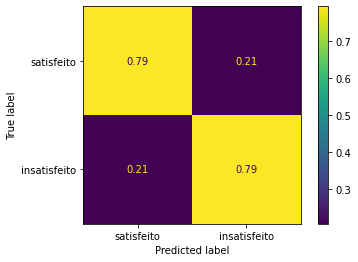

In [29]:
plot_confusion_matrix(rf, X_test2020s, y_test2020s, normalize='true', display_labels=['satisfeito','insatisfeito'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


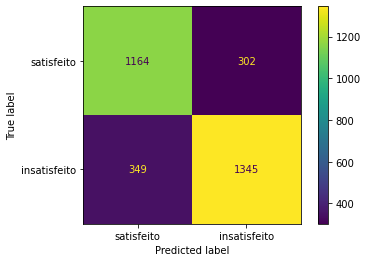

In [30]:
plot_confusion_matrix(rf, X_test2020s, y_test2020s, display_labels=['satisfeito','insatisfeito'])

### undersampling

In [38]:
rf.fit(X_nof2020us, y_nof2020us)

RandomForestClassifier()

In [39]:
ypred_rf = rf.predict(X_test2020s)

In [40]:
print(classification_report(y_test2020s, ypred_rf))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1466
           1       0.83      0.78      0.81      1694

    accuracy                           0.80      3160
   macro avg       0.80      0.80      0.80      3160
weighted avg       0.80      0.80      0.80      3160



In [41]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test2020s,ypred_rf))

0.7974683544303798


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


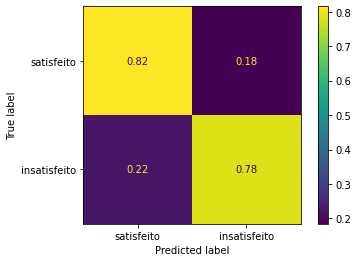

In [42]:
plot_confusion_matrix(rf, X_test2020s, y_test2020s, normalize='true', display_labels=['satisfeito','insatisfeito'])

## Aplicando GradientBoosting

In [31]:
gb = GradientBoostingClassifier()

### SMOTE

In [32]:
gb.fit(X_nof2020sm, y_nof2020sm)

GradientBoostingClassifier()

In [33]:
ypred_gb = gb.predict(X_test2020s)

In [34]:
print(classification_report(y_test2020s, ypred_gb))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1466
           1       0.82      0.81      0.82      1694

    accuracy                           0.81      3160
   macro avg       0.81      0.81      0.81      3160
weighted avg       0.81      0.81      0.81      3160



In [35]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test2020s,ypred_gb))

0.8063291139240506


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


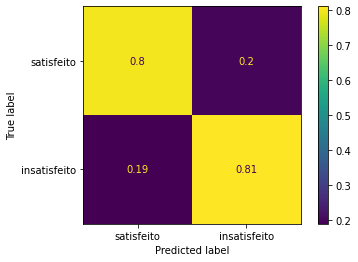

In [36]:
plot_confusion_matrix(gb, X_test2020s, y_test2020s, normalize='true', display_labels=['satisfeito','insatisfeito'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


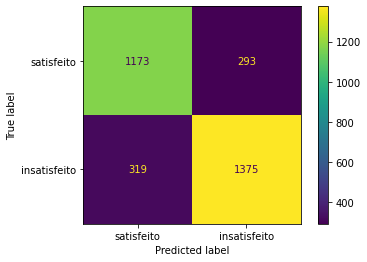

In [37]:
plot_confusion_matrix(gb, X_test2020s, y_test2020s, display_labels=['satisfeito','insatisfeito'])

### undersampling

In [44]:
gb.fit(X_nof2020us, y_nof2020us)

GradientBoostingClassifier()

In [45]:
ypred_gb = gb.predict(X_test2020s)

In [46]:
print(classification_report(y_test2020s, ypred_gb))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1466
           1       0.83      0.78      0.81      1694

    accuracy                           0.80      3160
   macro avg       0.80      0.80      0.80      3160
weighted avg       0.80      0.80      0.80      3160



In [47]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test2020s,ypred_gb))

0.7977848101265823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


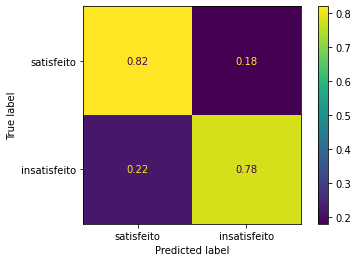

In [48]:
plot_confusion_matrix(gb, X_test2020s, y_test2020s, normalize='true', display_labels=['satisfeito','insatisfeito'])